Примерная схема (для понимания) <br>
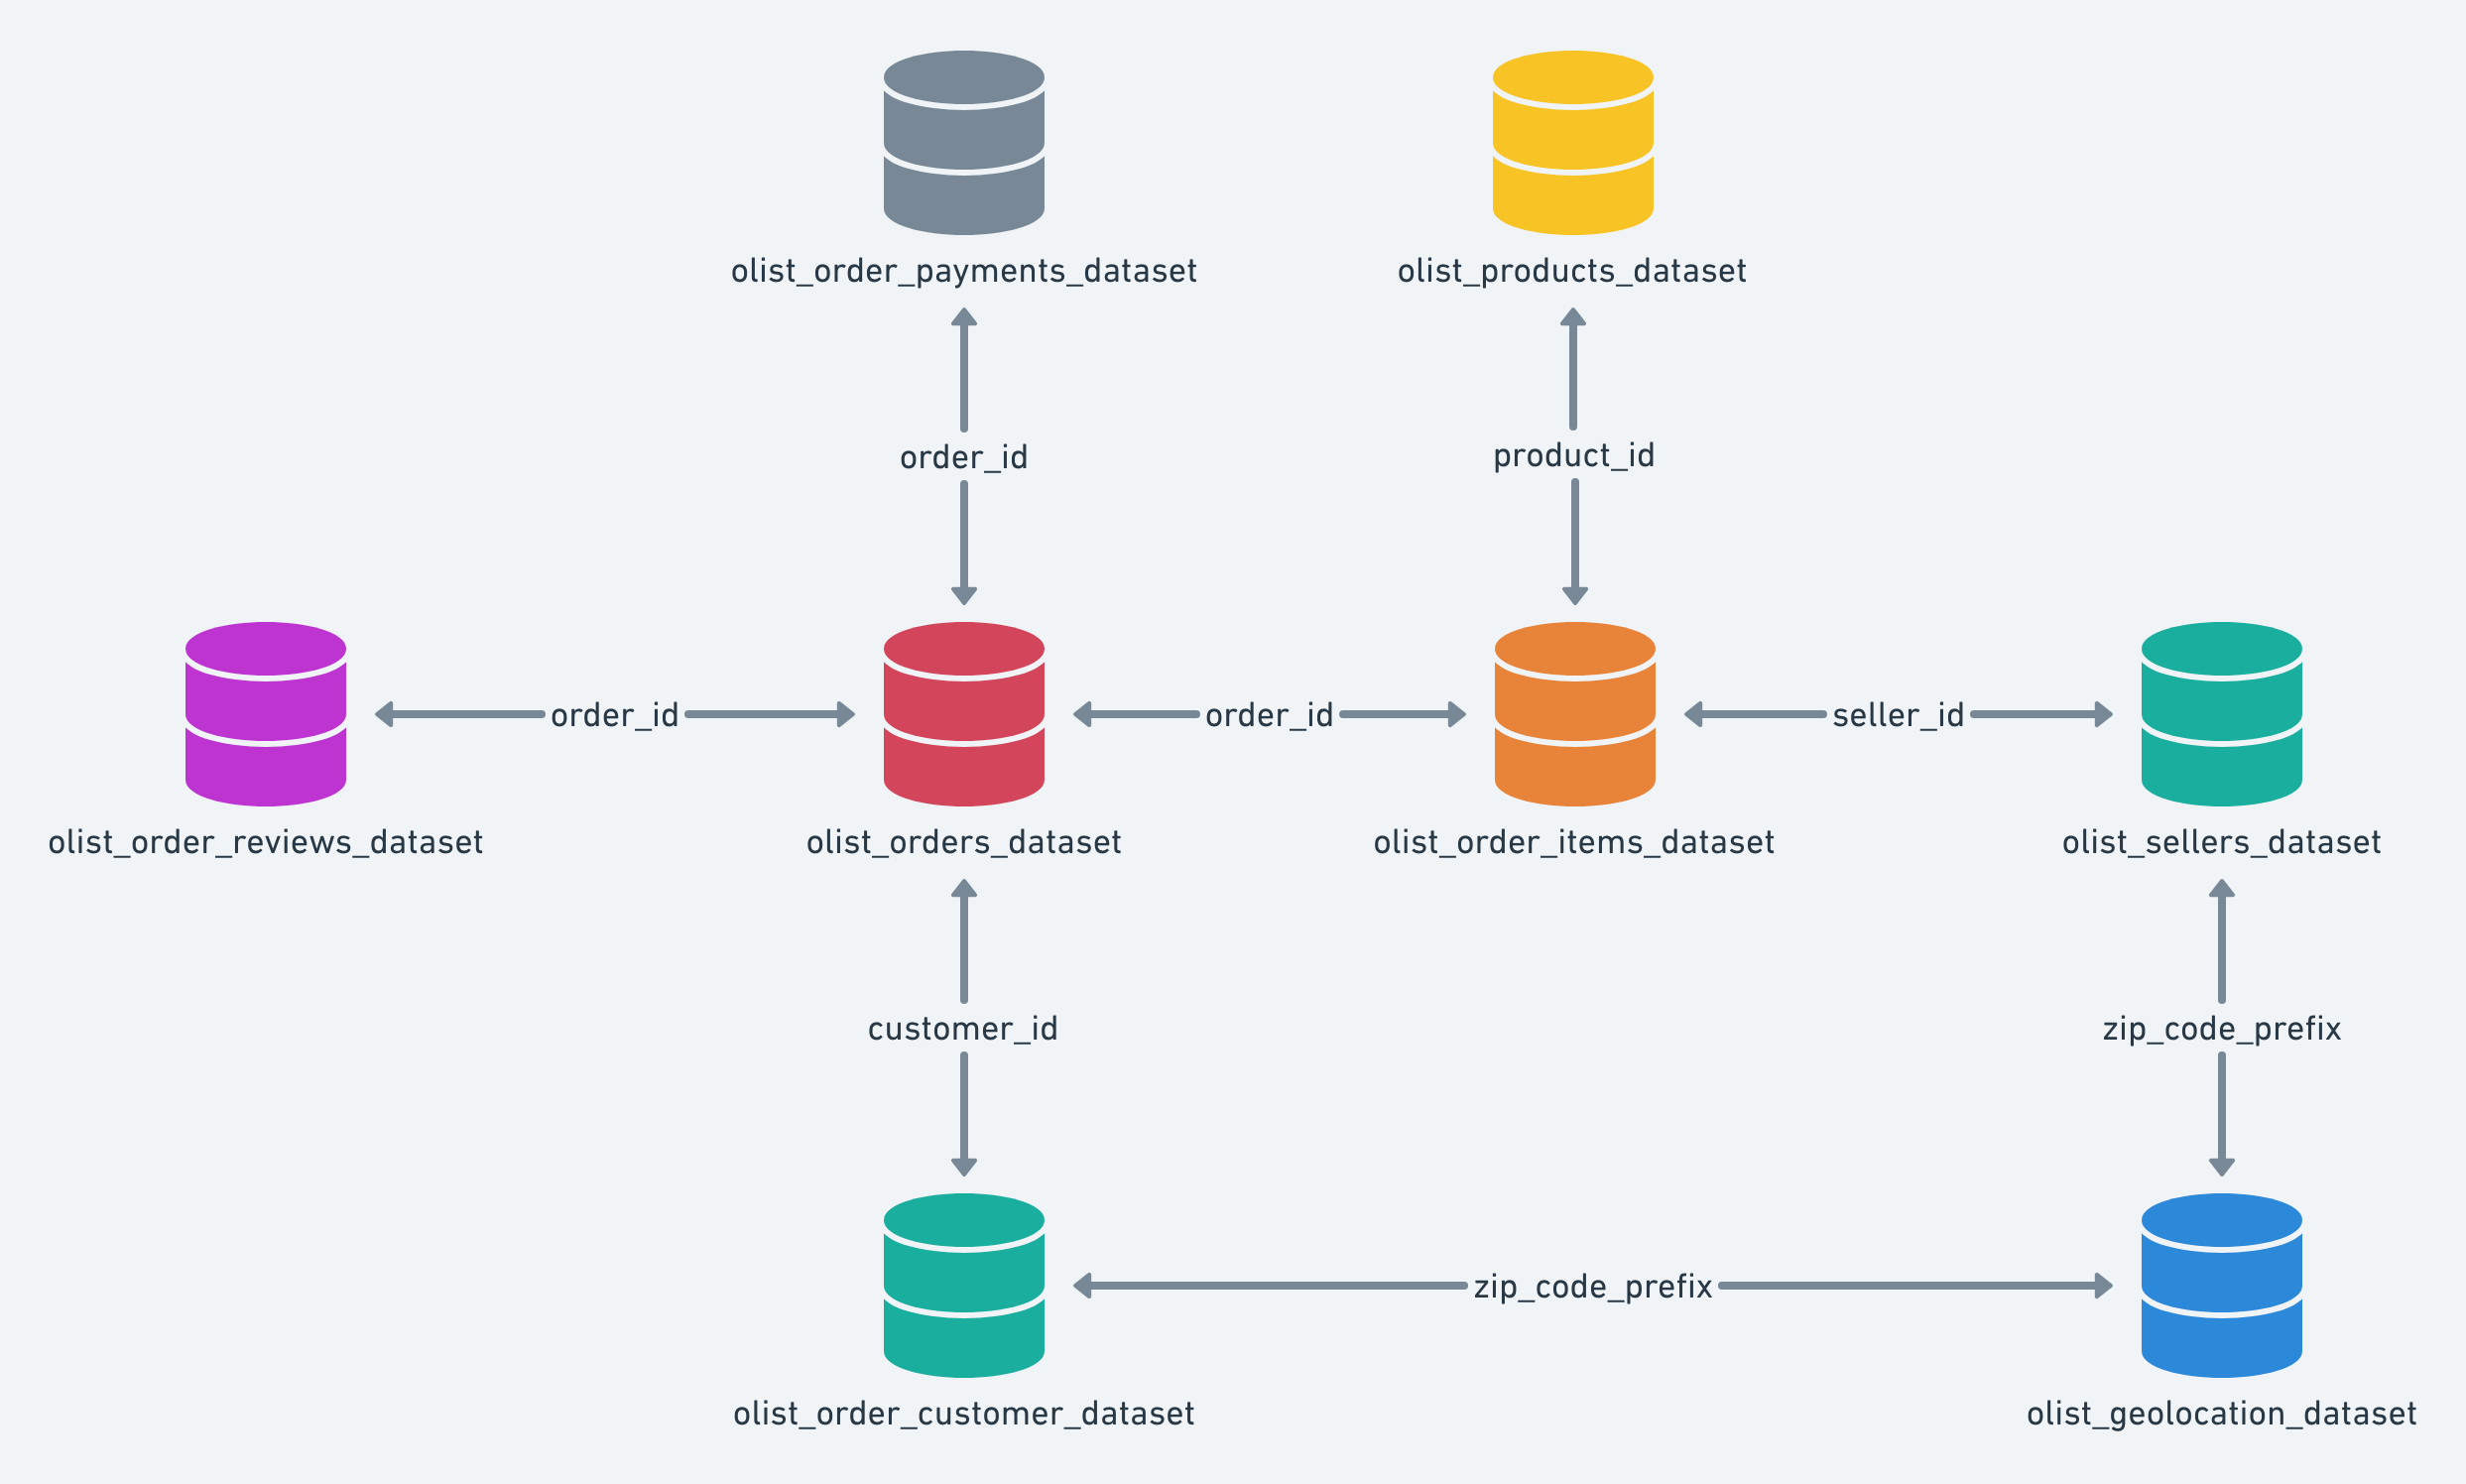

Реальная схема БД <br>
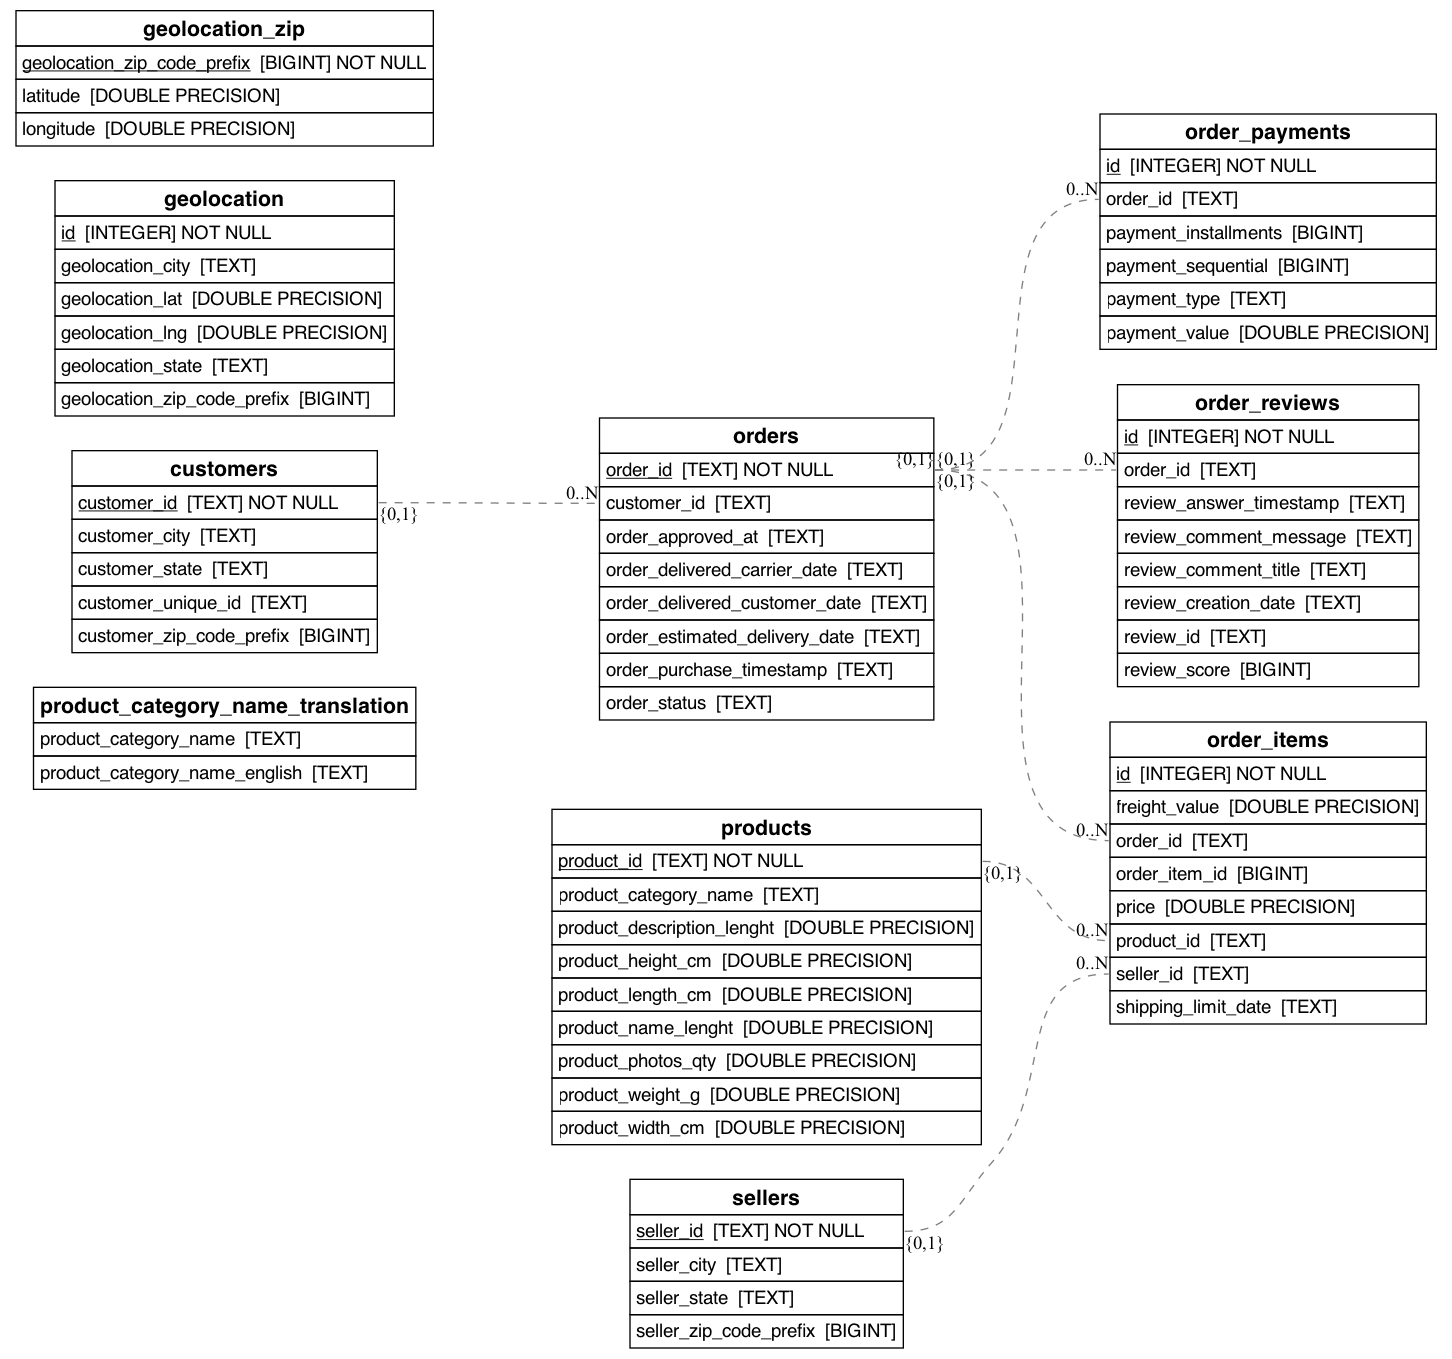

#### 🧑‍💼 Таблица `customers` (Клиенты)

| Столбец                    | Описание                                                |
|----------------------------|---------------------------------------------------------|
| **customer_id**            | Уникальный идентификатор клиента                        |
| customer_unique_id         | Идентификатор клиента (несколько заказов одного клиента)|
| customer_zip_code_prefix    | Почтовый индекс клиента                              |
| customer_city               | Город клиента                                         |
| customer_state              | Штат клиента                                          |

#### 📦 Таблица `orders` (Заказы)

| Столбец                       | Описание                                            |
|-------------------------------|-----------------------------------------------------|
| **order_id**                  | Уникальный идентификатор заказа                     |
| customer_id                   | Идентификатор клиента                               |
| order_status                  | Статус заказа                                       |
| order_purchase_timestamp      | Время создания заказа                               |
| order_approved_at             | Время подтверждения оплаты                          |
| order_delivered_carrier_date  | Время передачи заказа службе доставки               |
| order_delivered_customer_date | Время доставки клиенту                              |
| order_estimated_delivery_date | Планируемая дата доставки                           |

#### 📑 Таблица `order_items` (Товары в заказах)

| Столбец               | Описание                                                    |
|-----------------------|-------------------------------------------------------------|
| **id**                | Уникальный идентификатор записи                             |
| order_id              | Идентификатор заказа                                        |
| order_item_id         | Номер товара в заказе                                       |
| product_id            | Идентификатор товара                                        |
| seller_id             | Идентификатор продавца                                      |
| shipping_limit_date   | Срок передачи товара для доставки                           |
| price                 | Цена товара                                                 |
| freight_value         | Стоимость доставки                                          |

#### 🎁 Таблица `products` (Товары)

| Столбец                         | Описание                                          |
|---------------------------------|---------------------------------------------------|
| **product_id**                  | Уникальный идентификатор товара                   |
| product_category_name           | Категория товара (на португальском)               |
| product_name_lenght             | Длина названия товара                             |
| product_description_lenght      | Длина описания товара                             |
| product_photos_qty              | Количество фотографий товара                      |
| product_weight_g                | Вес товара (г)                                    |
| product_length_cm               | Длина товара (см)                                 |
| product_height_cm               | Высота товара (см)                                |
| product_width_cm                | Ширина товара (см)                                |

#### 🏪 Таблица `sellers` (Продавцы)

| Столбец                  | Описание                                                 |
|--------------------------|----------------------------------------------------------|
| **seller_id**             | Уникальный идентификатор продавца                       |
| seller_zip_code_prefix    | Почтовый индекс продавца                               |
| seller_city                | Город продавца                                        |
| seller_state               | Штат продавца                                         |

#### 🗺️ Таблица `geolocation` (Геоданные)

| Столбец                 | Описание                                                  |
|-------------------------|-----------------------------------------------------------|
| **id**                  | Уникальный идентификатор строки                           |
| geolocation_zip_code_prefix | Почтовый индекс                                      |
| geolocation_lat          | Широта                                                   |
| geolocation_lng          | Долгота                                                  |
| geolocation_city         | Название города                                          |
| geolocation_state        | Штат                                                     |

#### 💬 Таблица `order_reviews` (Отзывы)

| Столбец                   | Описание                                                 |
|---------------------------|----------------------------------------------------------|
| **id**                    | Уникальный идентификатор отзыва                          |
| review_id                 | Идентификатор отзыва от клиента                          |
| order_id                  | Идентификатор заказа                                     |
| review_score              | Оценка заказа (1-5)                                      |
| review_comment_title      | Заголовок отзыва                                         |
| review_comment_message    | Текст отзыва                                             |
| review_creation_date      | Дата создания отзыва                                     |
| review_answer_timestamp   | Дата ответа на отзыв                                     |

#### 💳 Таблица `order_payments` (Платежи)

| Столбец                   | Описание                                                  |
|---------------------------|-----------------------------------------------------------|
| **id**                    | Уникальный идентификатор платежа                          |
| order_id                  | Идентификатор заказа                                      |
| payment_sequential        | Порядковый номер платежа в заказе                         |
| payment_type              | Тип платежа (например, credit_card, boleto)               |
| payment_installments      | Количество платежей (рассрочка)                           |
| payment_value             | Сумма платежа                                             |

#### 🌐 Таблица `product_category_name_translation` (Перевод категорий товаров)

| Столбец                       | Описание                                              |
|-------------------------------|-------------------------------------------------------|
| product_category_name         | Название категории на португальском языке             |
| product_category_name_english | Название категории на английском языке                |


Цель проекта:
Проанализировать, как маркетинговые активности (промо-акции, email-рассылки, таргетированная реклама) влияют на поведение пользователей и выручку онлайн-магазина. Проверить гипотезы, провести A/B тесты и предложить сценарии для максимизации прибыли.

Источники данных:
* Открытый набор данных Olist Brazilian E-Commerce (https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
* Данные по маркетинговым кампаниям (сгенерировать самостоятельно на основе существующего набора данных, добавив искусственные рекламные активности и сегменты)

Используемые технологии и инструменты:
* СУБД: PostgreSQL
* Python: pandas, numpy, scipy, statsmodels, PySpark (для обработки больших объемов данных)
* Визуализация: PowerBI или Tableau
* Airflow (опционально, для автоматизации загрузки данных)
* GitHub, Jira, Confluence

In [4]:
load_dotenv()  # Загружает переменные из файла .env

True

In [3]:
import os
import pandas as pd
from sqlalchemy import create_engine, text
from sqlalchemy.exc import SQLAlchemyError
from tqdm import tqdm
from dotenv import load_dotenv




In [5]:
connection_string = os.getenv("DB_CONN")
engine = create_engine(connection_string)

In [3]:
def select(sql):
    return pd.read_sql(sql, engine)

In [4]:
sql = '''
SELECT *
FROM geolocation
LIMIT (5)
'''

In [5]:
select(sql)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,id
0,1037,-23.545621,-46.639292,sao paulo,SP,1
1,1046,-23.546081,-46.644820,sao paulo,SP,2
2,1046,-23.546129,-46.642951,sao paulo,SP,3
3,1041,-23.544392,-46.639499,sao paulo,SP,4
4,1035,-23.541578,-46.641607,sao paulo,SP,5
